## **Program to count coints**

In [1]:
%cd /content/drive/MyDrive/DLCV_workshop/Assessment

/content/drive/MyDrive/DLCV_workshop/Assessment


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#command to use cv2_imshow specific for google colab
#from google.colab.patches import cv2_imshow 

In [3]:
def displayImage(image):
    if len(image.shape)==3:
        color_coverted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize = (20,8))
        plt.imshow(color_coverted)
        plt.show()
        
    else:
        plt.figure(figsize = (20,8))
        plt.imshow(image, cmap="gray")
        plt.show()

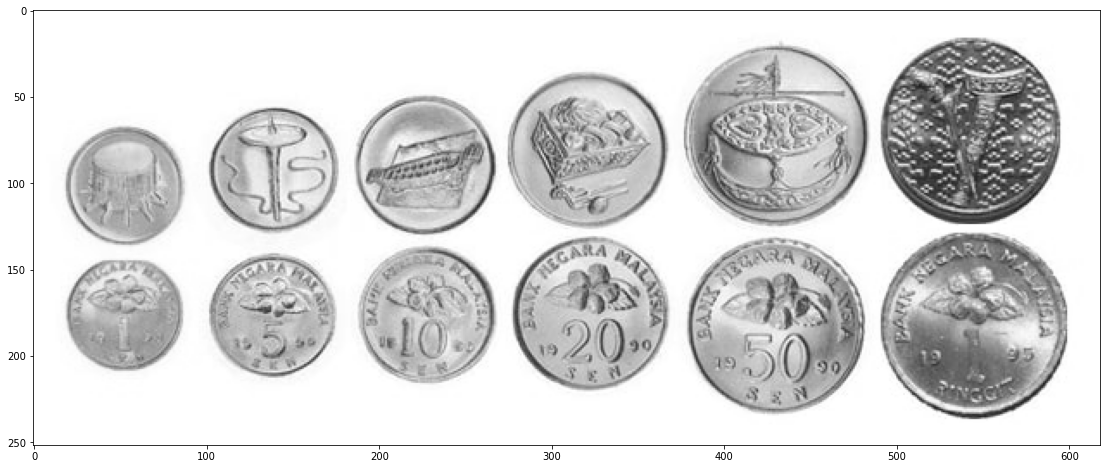

In [4]:
#convert image to gray first

image = cv2.imread('coins2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)

displayImage(gray)

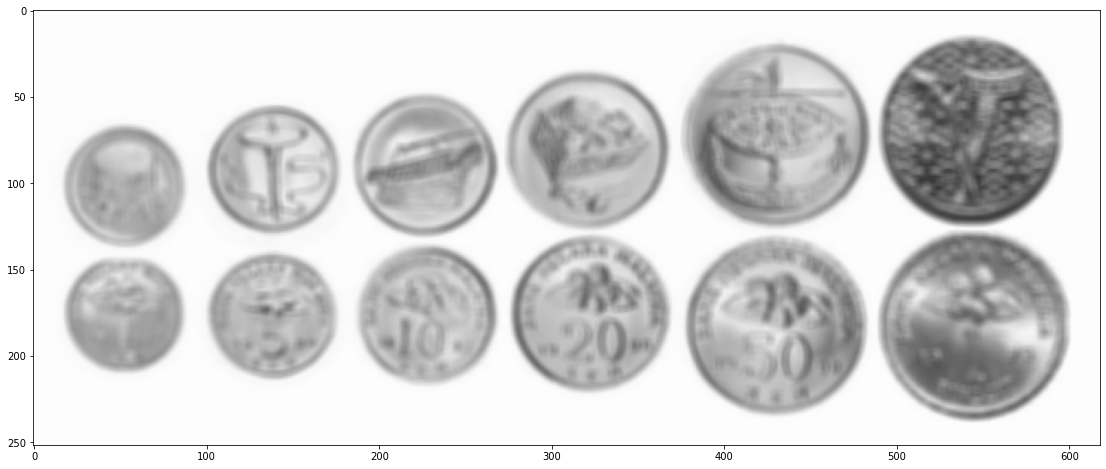

In [5]:
#blur the image using Gaussian Blur

imgBlur = cv2.GaussianBlur(gray,(5,5),5)

displayImage(imgBlur)

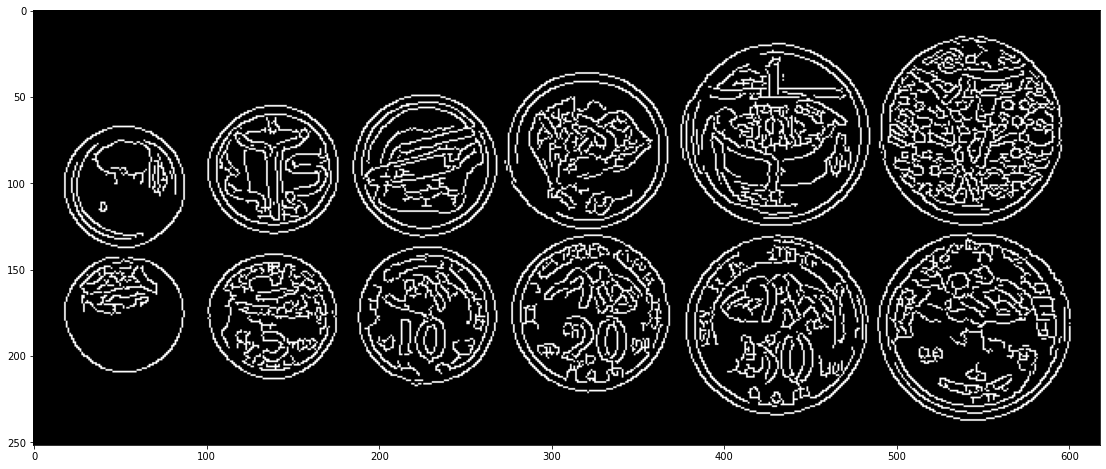

In [6]:
#detect the edge object in the image

edged = cv2.Canny(imgBlur, 20,100)

displayImage(edged)

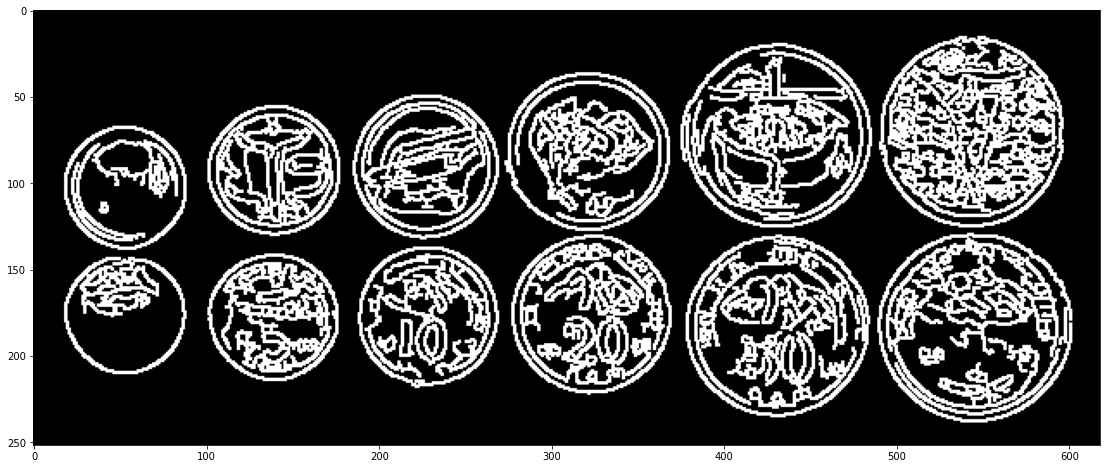

In [7]:
#dilate the image to get more edge clearer

kernel = np.ones((2,2),np.uint8)
img_dilation = cv2.dilate(edged, kernel, iterations=1)
displayImage(img_dilation)

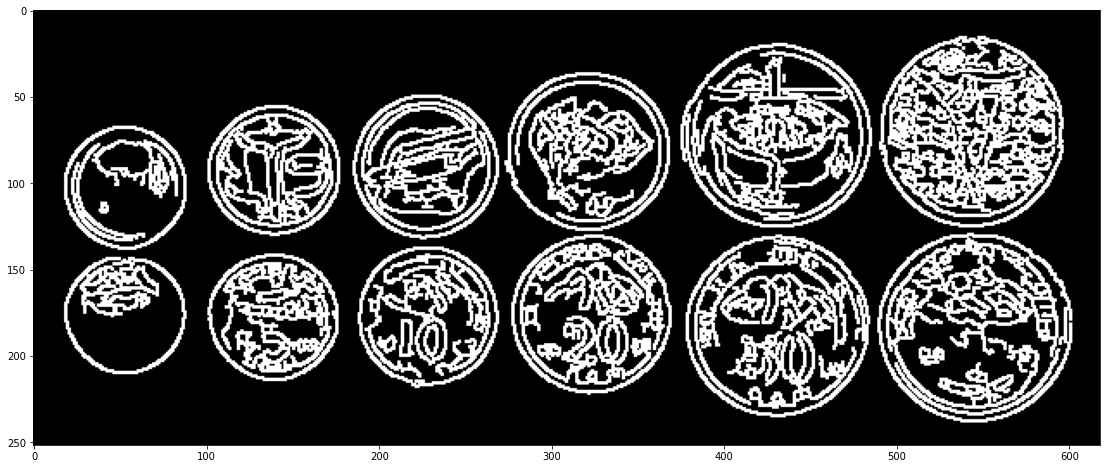

Number of Contours found = 12


In [8]:
#count the contours in the image
contours, hierarchy = cv2.findContours(img_dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
displayImage(img_dilation)
print("Number of Contours found = " + str(len(contours)))

Number of coins = 12


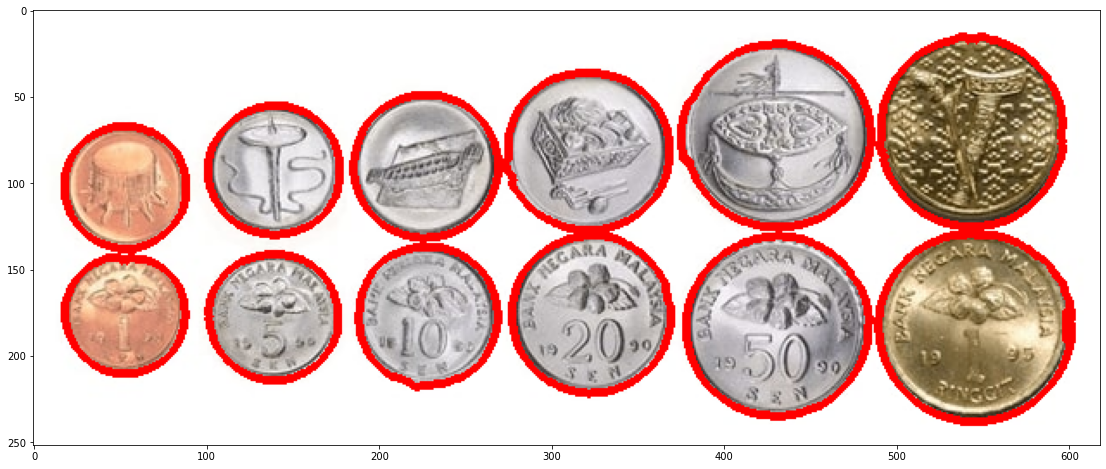

In [9]:
# Draw all contours
# -1 signifies drawing all contours
cv2.drawContours(image, contours, -1, (0, 0, 255), 3)
print("Number of coins = " + str(len(contours)))
displayImage(image)